In [1]:
import os
os.chdir('..')

from util import CONFIG
CONFIG.set_use_mpl_tables(True)

## Section 5.1

#### Section 5.1.1

In [2]:
from math import sqrt, pi, cos
N = 8
frequency = 1.7
samples = [1/sqrt(8)*cos(2 * pi * frequency * (t / N)) for t in range(N)]

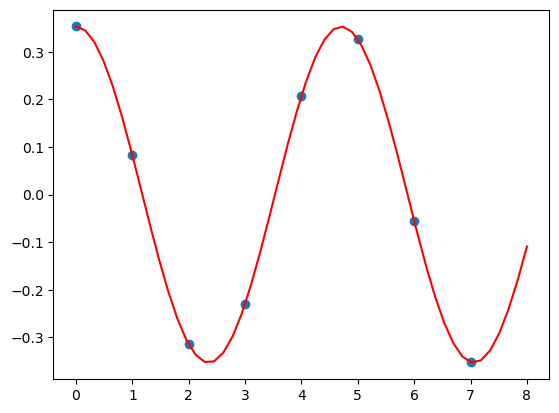

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, N, 50)
wave = [1/sqrt(8)*cos(2 * pi * frequency * (t/N)) for t in x]
plt.plot(x, wave, label='signal', color='red')
plt.scatter(range(N), samples)
plt.show()

In [4]:
f = np.fft.fft(samples)
f

array([ 0.01813862+0.j        , -0.11373594+0.34545166j,
        0.93169317-0.9912542j ,  0.40521579-0.17396922j,
        0.36394247+0.j        ,  0.40521579+0.17396922j,
        0.93169317+0.9912542j , -0.11373594-0.34545166j])

<StemContainer object of 3 artists>

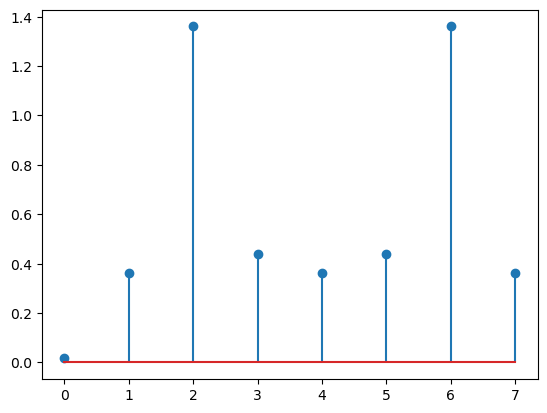

In [5]:
plt.stem(np.abs(f),use_line_collection=True)

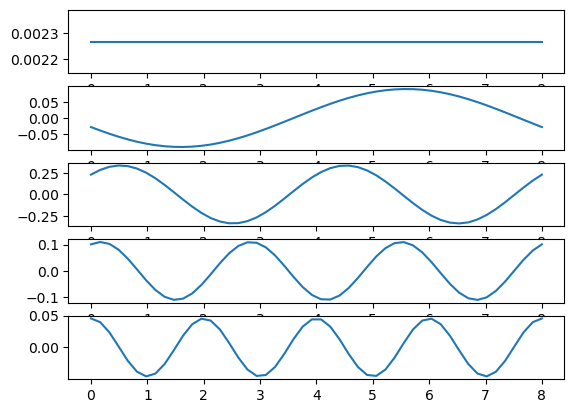

In [6]:
from math import atan2

a = abs(f)
d = [atan2(c.imag, c.real) for c in f]
fig, axs = plt.subplots(int(N / 2) + 1)
for k in range(int(N / 2) + 1):
    axs[k].plot(x, [(1 / N if k == 0 or k == N / 2 else 2 / N) * a[k] * cos(
        2 * pi / N * k * j + d[k]) for j in x])
plt.show()

#### Section 5.1.2

Listing 5.1

In [7]:
from math import pi
from sim_circuit import QuantumRegister, QuantumCircuit

def real_valued_sinusoids(n, v):
    N = 2**n
    theta = v*2*pi/N

    q = QuantumRegister(n)
    a = QuantumRegister(1)
    qc = QuantumCircuit(q, a) # ancilla is last qubit

    for j in range(n):
        qc.h(q[j])

    for j in range(n):
        qc.cry(2**(j+1)*theta, q[j], a[0])

    return qc

In [8]:
qc = real_valued_sinusoids(3, 1.7)
state = qc.run()

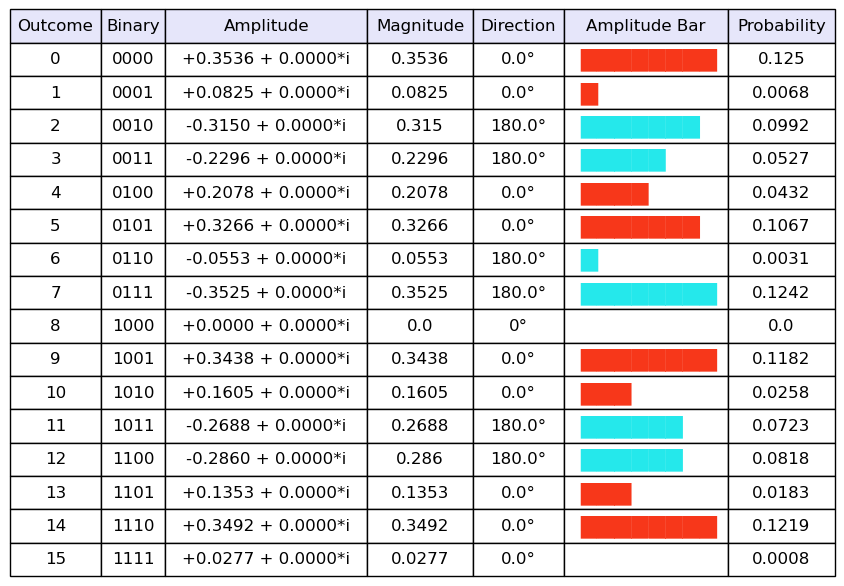

In [9]:
from util import show_state_table

show_state_table(state)

In [10]:
def cis(theta):
    return cos(theta) + 1j*sin(theta)

In [11]:
from math import sin

theta = pi/3
state = [sqrt(1/N) * cis(k*theta) for k in range(N)]

Listing 5.2

In [12]:
def geom(n, theta):
    N = 2**n
    return [sqrt(1/N) * cis(k*theta) for k in range(N)]

In [13]:
state = geom(3, pi/3)
[(round(amp.real, 5) + 1j*round(amp.imag, 5)) for amp in state]

[(0.35355+0j),
 (0.17678+0.30619j),
 (-0.17678+0.30619j),
 (-0.35355+0j),
 (-0.17678-0.30619j),
 (0.17678-0.30619j),
 (0.35355+0j),
 (0.17678+0.30619j)]

In [14]:
for k in range(len(state)):
    print("phase of amplitude ", k, ":", round(atan2(state[k].imag, state[k].real), 5))

phase of amplitude  0 : 0.0
phase of amplitude  1 : 1.0472
phase of amplitude  2 : 2.0944
phase of amplitude  3 : 3.14159
phase of amplitude  4 : -2.0944
phase of amplitude  5 : -1.0472
phase of amplitude  6 : -0.0
phase of amplitude  7 : 1.0472


In [15]:
state = geom(3, pi/6)
[(round(amp.real, 5) + 1j*round(amp.imag, 4)) for amp in state]

[(0.35355+0j),
 (0.30619+0.1768j),
 (0.17678+0.3062j),
 0.3536j,
 (-0.17678+0.3062j),
 (-0.30619+0.1768j),
 (-0.35355+0j),
 (-0.30619-0.1768j)]

Listing 5.3

In [16]:
def geometric_sequence_circuit(n, v):
    theta = v*2*pi/2**n

    q = QuantumRegister(n)
    qc = QuantumCircuit(q)

    for j in range(n):
        qc.h(q[j])

    for j in range(n):
        qc.p(2 ** j * theta, q[j])

    return qc

In [17]:
n = 3
v = 1.7
qc = geometric_sequence_circuit(n, v)
state = qc.run()

from util import all_close

theta = v*2*pi/2**n
assert all_close(state, [sqrt(1/2**n) * cis(k*theta) for k in range(2**n)])

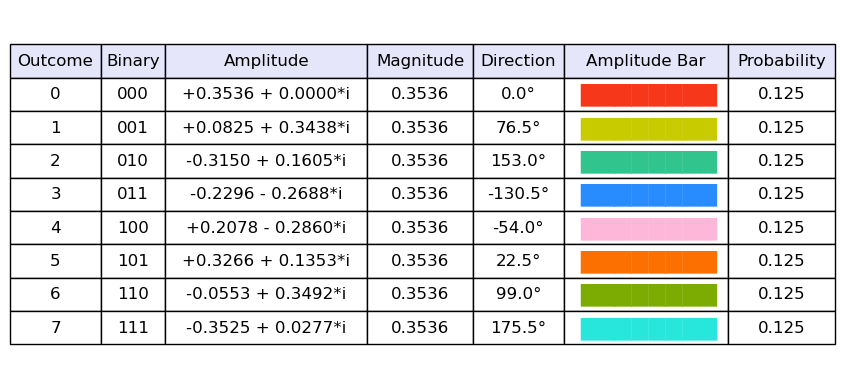

In [18]:
show_state_table(state)

#### Section 5.1.3

In [19]:
N = 8
omega = cis(2*pi/N)
abs(omega**N)

1.0

In [20]:
omega = cis(2*pi/N)
sequence = [omega**k for k in range(N)]
[(round(amp.real, 5) + 1j*round(amp.imag, 4)) for amp in sequence]

[(1+0j),
 (0.70711+0.7071j),
 1j,
 (-0.70711+0.7071j),
 (-1+0j),
 (-0.70711-0.7071j),
 (-0-1j),
 (0.70711-0.7071j)]

In [21]:
N = 8
sequence = [cis(l*2*pi/N) for l in range(N)]
[(round(amp.real, 5) + 1j*round(amp.imag, 4)) for amp in sequence]

[(1+0j),
 (0.70711+0.7071j),
 1j,
 (-0.70711+0.7071j),
 (-1+0j),
 (-0.70711-0.7071j),
 (-0-1j),
 (0.70711-0.7071j)]

## Section 5.2

In [22]:
state = geom(1, pi/3)

In [23]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)

theta = pi/3
qc.h(q[0])
qc.p(theta, q[0])
qc.h(q[0])

state = qc.run()

In [24]:
from util import is_close
theta = pi/3
[(round(amp.real, 5) + 1j*round(amp.imag, 5)) for amp in state]
assert(is_close(abs(state[0]), cos(theta/2)))
assert(is_close(abs(state[1]), sin(theta/2)))

## Section 5.3

In [25]:
quantities = [4, 2, 2, 3]
prices = [1.2, 1.5, 2, 0.7]

In [26]:
sum([quantities[k] * prices[k] for k in range(len(quantities))])

13.9

Listing 5.4

In [27]:
def inner(v1, v2):
    assert(len(v1) == len(v2))
    return sum(z1*z2.conjugate() for z1, z2 in zip(v1, v2))

## Section 5.4

#### Section 5.4.1

In [28]:
N = 4
omega = cis(2*pi/N)
F_0 = [omega**(0*k) for k in range(N)]
F_1 = [omega**(1*k) for k in range(N)]
F_2 = [omega**(2*k) for k in range(N)]
F_3 = [omega**(3*k) for k in range(N)]

In [29]:
F_0

[(1+0j), (1+0j), (1+0j), (1+0j)]

In [30]:
N = 4
F_0 = [cis(k*0*2*pi/N) for k in range(N)]
F_1 = [cis(k*1*2*pi/N) for k in range(N)]
F_2 = [cis(k*2*2*pi/N) for k in range(N)]
F_3 = [cis(k*3*2*pi/N) for k in range(N)]

In [31]:
N = 8
frequency = 1.7
samples = [1/sqrt(N)*cos(2 * pi * frequency * (i / N)) for i in range(N)]

In [32]:
F_0 = [cis(k*0*2*pi/N) for k in range(N)]
similarity = inner(samples, F_0)
round(similarity.real, 5) + 1j*round(similarity.imag, 5)

(0.01814+0j)

In [33]:
dft = [inner(samples, [cis(k*l*2*pi/N) for k in range(N)]) for l in range(8)]
[(round(x.real, 5) + 1j*round(x.imag, 5)) for x in dft]

[(0.01814+0j),
 (-0.11374+0.34545j),
 (0.93169-0.99125j),
 (0.40522-0.17397j),
 (0.36394+0j),
 (0.40522+0.17397j),
 (0.93169+0.99125j),
 (-0.11374-0.34545j)]

In [34]:
f = np.fft.fft(samples)
f

array([ 0.01813862+0.j        , -0.11373594+0.34545166j,
        0.93169317-0.9912542j ,  0.40521579-0.17396922j,
        0.36394247+0.j        ,  0.40521579+0.17396922j,
        0.93169317+0.9912542j , -0.11373594-0.34545166j])

#### Section 5.4.2

Listing 5.5

In [35]:
def fourier_basis(N, l):
    return [1/sqrt(N) * cis(k*l*2*pi/N) for k in range(N)]

In [36]:
N = 8
v = 1.7
state = [1/sqrt(N)*cos(k*v*2*pi/N) for k in range(N)] \
        + [1/sqrt(N)*sin(k*v*2*pi/N) for k in range(N)]

In [37]:
similarity = inner(state[:N], fourier_basis(N,0))
round(similarity.real, 5) + 1j*round(similarity.imag, 5)

(0.00641+0j)

In [38]:
similarity/(1/sqrt(8))

(0.018138624438612378+0j)

In [39]:
iqft = [inner(state[:N], fourier_basis(N, k)) for k in range(N)] + \
       [inner(state[N:], fourier_basis(N, k)) for k in range(N)]

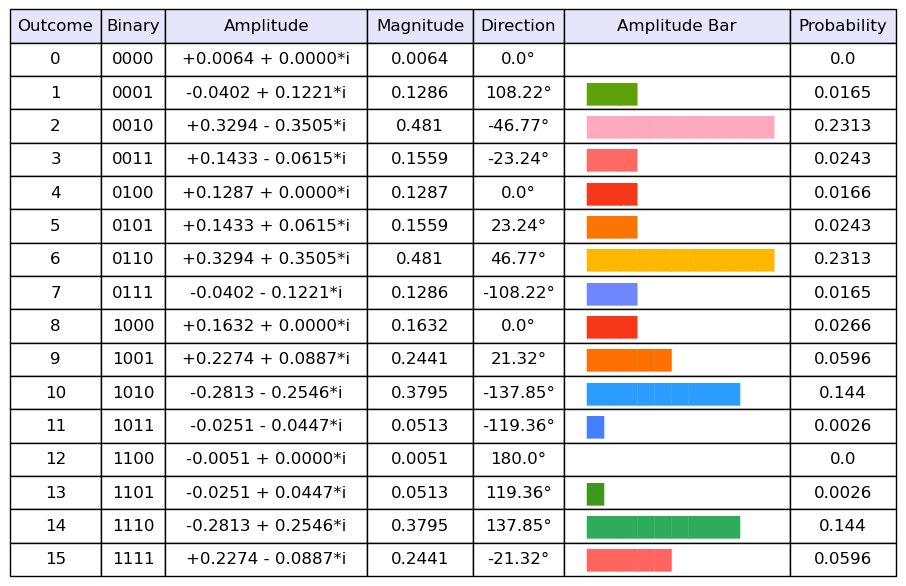

In [40]:
show_state_table(iqft)

Listing 5.6

In [41]:
def icft(state):
    N = len(state)
    s = [state[k] for k in range(N)]

    for i in range(N):
        state[i] = inner(s, fourier_basis(N, i))

Listing 5.7

In [42]:
def cft(state):
    N = len(state)
    s = [state[k] for k in range(N)]

    for i in range(N):
        state[i] = inner(s, fourier_basis(N, -i))

## Section 5.5

Listing 5.8

In [43]:
def qft(self, targets, swap=True):
    for j in range(len(targets))[::-1]:
        self.h(targets[j])
        for k in range(j)[::-1]:
            self.cp(pi * 2.0 ** (k - j), targets[j], targets[k])

    if swap:
        self.mswap(targets)

def iqft(self, targets, swap=True):
    for j in range(len(targets))[::-1]:
        self.h(targets[j])
        for k in range(j)[::-1]:
            self.cp(-pi * 2 ** (k - j), targets[j], targets[k])

    if swap:
        self.mswap(targets)

#### Section 5.5.1

In [44]:
divmod(13, 2)

(6, 1)

In [45]:
divmod(6, 2)

(3, 0)

In [46]:
divmod(3, 2)

(1, 1)

In [47]:
divmod(1, 2)

(0, 1)